**Dataset:**

Ce dataset est un tableau structuré de 918 observations et 12 colonnes, combinant cinq sources différentes sur les maladies cardiaques, avec des variables numériques et catégorielles liées aux patients.

Les colonnes incluent des informations comme l’âge, le sexe, le type de douleur thoracique, la pression artérielle, le cholestérol, la glycémie à jeun, et d’autres indicateurs médicaux, tandis que la colonne cible HeartDisease indique si le patient a une maladie cardiaque (1) ou non (0).

L’objectif principal de ce dataset est de prédire la présence ou l’absence de maladie cardiaque chez un patient, afin de faciliter la détection précoce et la gestion des risques cardiovasculaires



In [1]:
# Étape 1 : Chargement et visualisation
import pandas as pd
# a. Chargement des données
df = pd.read_csv("/content/drive/MyDrive/projet ML/heart.csv")
# b. Afficher les 5 premières lignes
print(df.head())
# c. Infos sur le dataset (types, non null, etc.)
print(df.info())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

On constate que le dataset contient 12 colonnes et plusieurs lignes, toutes sans valeurs manquantes. Chaque colonne a un type bien défini : 6 colonnes sont de type entier (int64), 1 de type réel (float64), et 5 de type catégoriel/texte (object), comme Sex, ChestPainType, RestingECG, etc.

In [2]:
# Remplissage des valeurs manquantes par la moyenne (pour les colonnes numériques)
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())

# Remplissage par la valeur la plus fréquente (mode) pour les colonnes catégorielles
df['ChestPainType'] = df['ChestPainType'].fillna(df['ChestPainType'].mode()[0])


Pour gérer les valeurs manquantes, les colonnes numériques comme Cholesterol ont été remplies par leur moyenne, tandis que les colonnes catégorielles comme ChestPainType ont été complétées par leur valeur la plus fréquente (mode).

In [3]:
from sklearn.preprocessing import LabelEncoder
import pickle
le = LabelEncoder()
encodeurs = {}
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    encodeurs[col] = le  # stocker l'encodeur pour chaque colonne
with open('encodeurs.pkl', 'wb') as f:
    pickle.dump(encodeurs, f)
from google.colab import files
files.download('encodeurs.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Les colonnes catégorielles comme Sex, ChestPainType, RestingECG, etc., ont été encodées en valeurs numériques à l'aide de LabelEncoder pour les rendre compatibles avec les algorithmes de machine learning.
Chaque encodeur a été enregistré dans un dictionnaire, puis sauvegardé dans un fichier encodeurs.pkl afin de pouvoir être réutilisé plus tard.

In [4]:
from sklearn.preprocessing import StandardScaler
import pickle
scaler = StandardScaler()
# Colonnes numériques à normaliser (on exclut la cible 'HeartDisease')
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

df[num_cols] = scaler.fit_transform(df[num_cols])
# Sauvegarde du scaler dans un fichier
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
from google.colab import files
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Les colonnes numériques comme Age, RestingBP, Cholesterol, etc., ont été normalisées à l’aide de StandardScaler afin de ramener leurs valeurs à une même échelle (moyenne 0, écart-type 1), ce qui améliore la performance de nombreux modèles de machine learning.
Le scaler entraîné a été enregistré dans un fichier scaler.pkl pour pouvoir être réutilisé ultérieurement lors des prédictions sur de nouvelles données.

In [5]:
# Y est la colonne cible
Y = df['HeartDisease']

# X contient toutes les autres colonnes sauf la cible
X = df.drop('HeartDisease', axis=1)


**Y = df['HeartDisease'] :**
 on extrait la colonne cible HeartDisease, qui indique la présence (1) ou l'absence (0) d'une maladie cardiaque.

**X = df.drop('HeartDisease', axis=1) :**
 on conserve dans X toutes les autres colonnes du dataset, qui seront utilisées comme variables d'entrée pour entraîner un modèle de machine learning.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42, stratify=Y)

On divise les données en un ensemble d’entraînement et un ensemble de test, où 80% des données sont utilisées pour l’entraînement et 20% pour le test, tout en conservant la même proportion de classes grâce à la stratification.

In [7]:
from sklearn.linear_model import LogisticRegression

# Création du modèle
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, Y_train)  # Entraînement du modèle

Y_pred = model.predict(X_test)  # Prédiction

On crée un modèle de régression logistique, un algorithme de classification souvent utilisé pour les problèmes binaires comme la détection de maladies.
Le modèle est entraîné avec les données d’entraînement (X_train, Y_train), puis utilisé pour prédire les classes sur les données de test (X_test).

Accuracy de régression logistique: 0.88


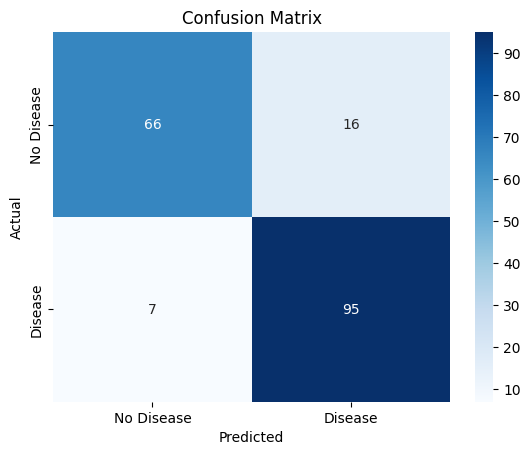

              precision    recall  f1-score   support

  No Disease       0.90      0.80      0.85        82
     Disease       0.86      0.93      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# a. Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy de régression logistique: {accuracy:.2f}")

# b. Matrice de confusion
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# c. Classification report
report = classification_report(Y_test, Y_pred, target_names=['No Disease', 'Disease'])
print(report)


**les performances du modèle:**

**Accuracy :**
 Le modèle atteint une précision de 88%, ce qui signifie qu’il fait de bonnes prédictions dans la majorité des cas.

**Matrice de confusion :**
Elle montre le nombre de vrais positifs, vrais négatifs, faux positifs, et faux négatifs :

*   Les lignes représentent les vraies classes,
*   Les colonnes représentent les classes prédites.

Dans mon modele, on a:

**Pour les cas sains ("No Disease") :**


*   82 cas réels au total

*   66 correctement prédits comme sains (vrais négatifs)
*   16 mal classés comme malades (faux positifs)

**Pour les cas malades ("Disease") :**


*   102 cas réels au total


*   95 correctement détectés comme malades (vrais positifs)
*   7 manqués (prédits sains alors que malades, faux négatifs)

**Rapport de classification :**
Il donne des métriques plus détaillées pour chaque classe:

*   **Précision (precision) :** taux de vraies prédictions positives sur l’ensemble des prédictions positives.

     "No Disease" : 90% des prédictions positives étaient correctes.

     "Disease" : 86% des prédictions positives étaient correctes.
*   **Rappel (recall) :**
 capacité à identifier les vrais cas positifs.
  
  "No Disease" : 80% des vrais cas détectés.

  "Disease" : 93% des vrais cas détectés.
*   **F1-score :**
 moyenne harmonique entre précision et rappel.

 Bon équilibre entre précision et rappel (0.85-0.89).

In [ ]:
import pickle
# Sauvegarde du modèle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

On sauvegarde le modèle entraîné dans un fichier nommé model.pkl grâce à la bibliothèque pickle, ce qui permet de le réutiliser plus tard sans avoir à le réentraîner. Ensuite, on télécharge ce fichier depuis l’environnement Colab.

KNN Accuracy: 0.8641


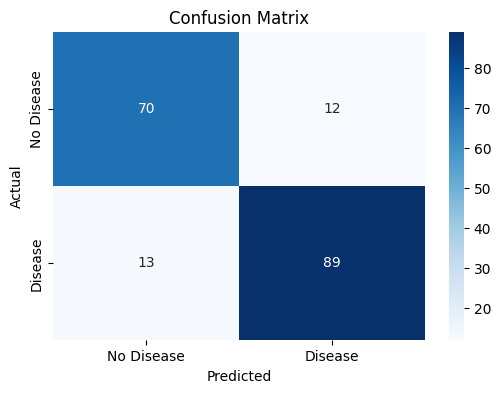

              precision    recall  f1-score   support

  No Disease       0.84      0.85      0.85        82
     Disease       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)
Y_pred_knn = model_knn.predict(X_test)
acc_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.4f}")
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, Y_pred_knn)
# Afficher la matrice
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report
# Générer le rapport
report = classification_report(Y_test, Y_pred_knn,target_names=['No Disease', 'Disease'])
print(report)

On a utilisé le modèle KNN pour prédire la présence ou non d’une maladie cardiaque à partir des données d’entraînement. Après évaluation sur l’ensemble de test, on a obtenu une accuracy de 86,41%, ce qui signifie que le modèle prédit correctement dans environ 86 cas sur 100.

SVM Accuracy: 0.8804


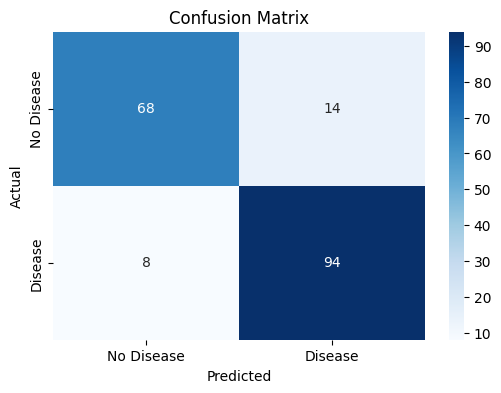

              precision    recall  f1-score   support

  No Disease       0.89      0.83      0.86        82
     Disease       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [11]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, Y_train)
Y_pred_svc = model_svc.predict(X_test)
acc_svc = accuracy_score(Y_test, Y_pred_svc)
print(f"SVM Accuracy: {acc_svc:.4f}")
# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, Y_pred_svc)
# Afficher la matrice
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report
# Générer le rapport
report = classification_report(Y_test, Y_pred_svc,target_names=['No Disease', 'Disease'])
print(report)

On a utilisé un modèle SVM (Support Vector Machine) pour entraîner les données, puis faire des prédictions sur l’ensemble de test. Ce modèle a obtenu une accuracy de 88,04%, ce qui montre une bonne capacité à distinguer les patients avec et sans maladie cardiaque.

Random Forest Accuracy: 0.8750


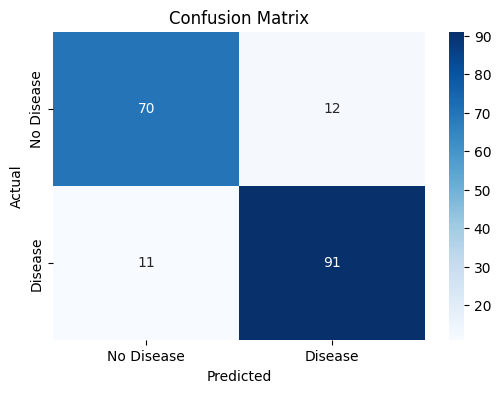

              precision    recall  f1-score   support

  No Disease       0.86      0.85      0.86        82
     Disease       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")
# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, Y_pred_rf)
# Afficher la matrice
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report

# Générer le rapport
report = classification_report(Y_test,Y_pred_rf, target_names=['No Disease', 'Disease'])
print(report)

On a utilisé un modèle Random Forest pour entraîner les données, puis effectuer des prédictions sur l’ensemble de test. Ce modèle a atteint une accuracy de 87,50%, ce qui indique une performance solide dans la classification des patients atteints ou non de maladie cardiaque.



Naive Bayes Accuracy: 0.8913


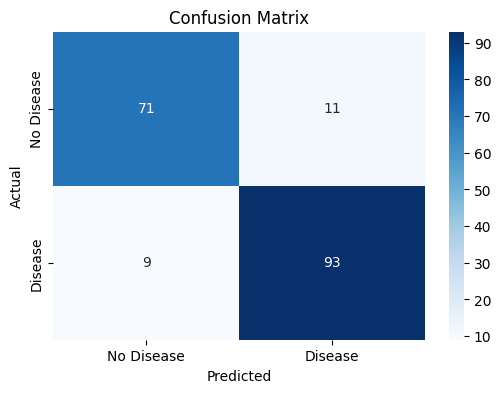

              precision    recall  f1-score   support

  No Disease       0.89      0.87      0.88        82
     Disease       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [13]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)
Y_pred_nb = model_nb.predict(X_test)
acc_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
# Calculer la matrice de confusion
cm = confusion_matrix(Y_test,Y_pred_nb)
# Afficher la matrice
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report

# Générer le rapport
report = classification_report(Y_test, Y_pred_nb,target_names=['No Disease', 'Disease'])
print(report)

On a utilisé un modèle Naive Bayes Gaussien pour entraîner les données et faire les prédictions sur l’ensemble de test. Ce modèle a obtenu une accuracy de 89,13 %, ce qui est très bon et montre qu’il est performant pour détecter la présence ou l’absence de maladie cardiaque dans ce dataset.

AdaBoost Accuracy: 0.8859


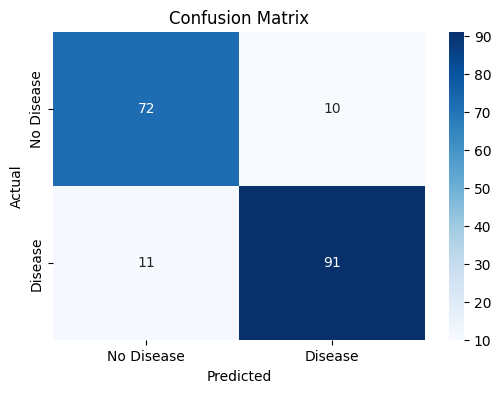

              precision    recall  f1-score   support

  No Disease       0.87      0.88      0.87        82
     Disease       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [14]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train, Y_train)
Y_pred_ada = model_ada.predict(X_test)
acc_ada = accuracy_score(Y_test, Y_pred_ada)
print(f"AdaBoost Accuracy: {acc_ada:.4f}")
# Calculer la matrice de confusion
cm = confusion_matrix(Y_test,Y_pred_ada)
# Afficher la matrice
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report

# Générer le rapport
report = classification_report(Y_test, Y_pred_ada,target_names=['No Disease', 'Disease'])
print(report)

On a utilisé un modèle AdaBoost pour entraîner les données et faire des prédictions sur l’ensemble de test. Ce modèle a obtenu une accuracy de 88,59 %, ce qui est très satisfaisant et montre qu’AdaBoost est efficace pour cette tâche de classification sur le dataset.

In [16]:
from sklearn.model_selection import GridSearchCV
# Grid Search for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_knn.fit(X_train, Y_train)
print("\n--- KNN Grid Search Results ---")
print("Best parameters:", grid_knn.best_params_)
print("Best cross-validation accuracy:", grid_knn.best_score_)
best_knn_model = grid_knn.best_estimator_
Y_pred_knn_tuned = best_knn_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_knn_tuned))
print("Classification Report:\n", classification_report(Y_test, Y_pred_knn_tuned, target_names=['No Disease', 'Disease']))


# Grid Search for SVM
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid_svc = GridSearchCV(SVC(), param_grid_svc, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_svc.fit(X_train, Y_train)
print("\n--- SVM Grid Search Results ---")
print("Best parameters:", grid_svc.best_params_)
print("Best cross-validation accuracy:", grid_svc.best_score_)
best_svc_model = grid_svc.best_estimator_
Y_pred_svc_tuned = best_svc_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_svc_tuned))
print("Classification Report:\n", classification_report(Y_test, Y_pred_svc_tuned, target_names=['No Disease', 'Disease']))

# Grid Search for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_rf.fit(X_train, Y_train)
print("\n--- Random Forest Grid Search Results ---")
print("Best parameters:", grid_rf.best_params_)
print("Best cross-validation accuracy:", grid_rf.best_score_)
best_rf_model = grid_rf.best_estimator_
Y_pred_rf_tuned = best_rf_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_rf_tuned))
print("Classification Report:\n", classification_report(Y_test, Y_pred_rf_tuned, target_names=['No Disease', 'Disease']))

# Grid Search for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_ada.fit(X_train, Y_train)
print("\n--- AdaBoost Grid Search Results ---")
print("Best parameters:", grid_ada.best_params_)
print("Best cross-validation accuracy:", grid_ada.best_score_)
best_ada_model = grid_ada.best_estimator_
Y_pred_ada_tuned = best_ada_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_ada_tuned))
print("Classification Report:\n", classification_report(Y_test, Y_pred_ada_tuned, target_names=['No Disease', 'Disease']))

# Naive Bayes does not typically use GridSearchCV for hyperparameter tuning in the same way as the other models,
# as it has few hyperparameters. The default GaussianNB is often used.
# However, you could potentially tune the var_smoothing parameter.

# Example of tuning var_smoothing for GaussianNB
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_nb.fit(X_train, Y_train)
print("\n--- Gaussian Naive Bayes Grid Search Results ---")
print("Best parameters:", grid_nb.best_params_)
print("Best cross-validation accuracy:", grid_nb.best_score_)
best_nb_model = grid_nb.best_estimator_
Y_pred_nb_tuned = best_nb_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_nb_tuned))
print("Classification Report:\n", classification_report(Y_test, Y_pred_nb_tuned, target_names=['No Disease', 'Disease']))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- KNN Grid Search Results ---
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation accuracy: 0.8637592023110614
Test Accuracy: 0.9021739130434783
Classification Report:
               precision    recall  f1-score   support

  No Disease       0.88      0.90      0.89        82
     Disease       0.92      0.90      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Fitting 5 folds for each of 32 candidates, totalling 160 fits

--- SVM Grid Search Results ---
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.859640294473954
Test Accuracy: 0.8804347826086957
Classification Report:
               precision    recall  f1-score   support

  No Disease       0.89      0.83      0.86        82
     Disease   

**interface:**


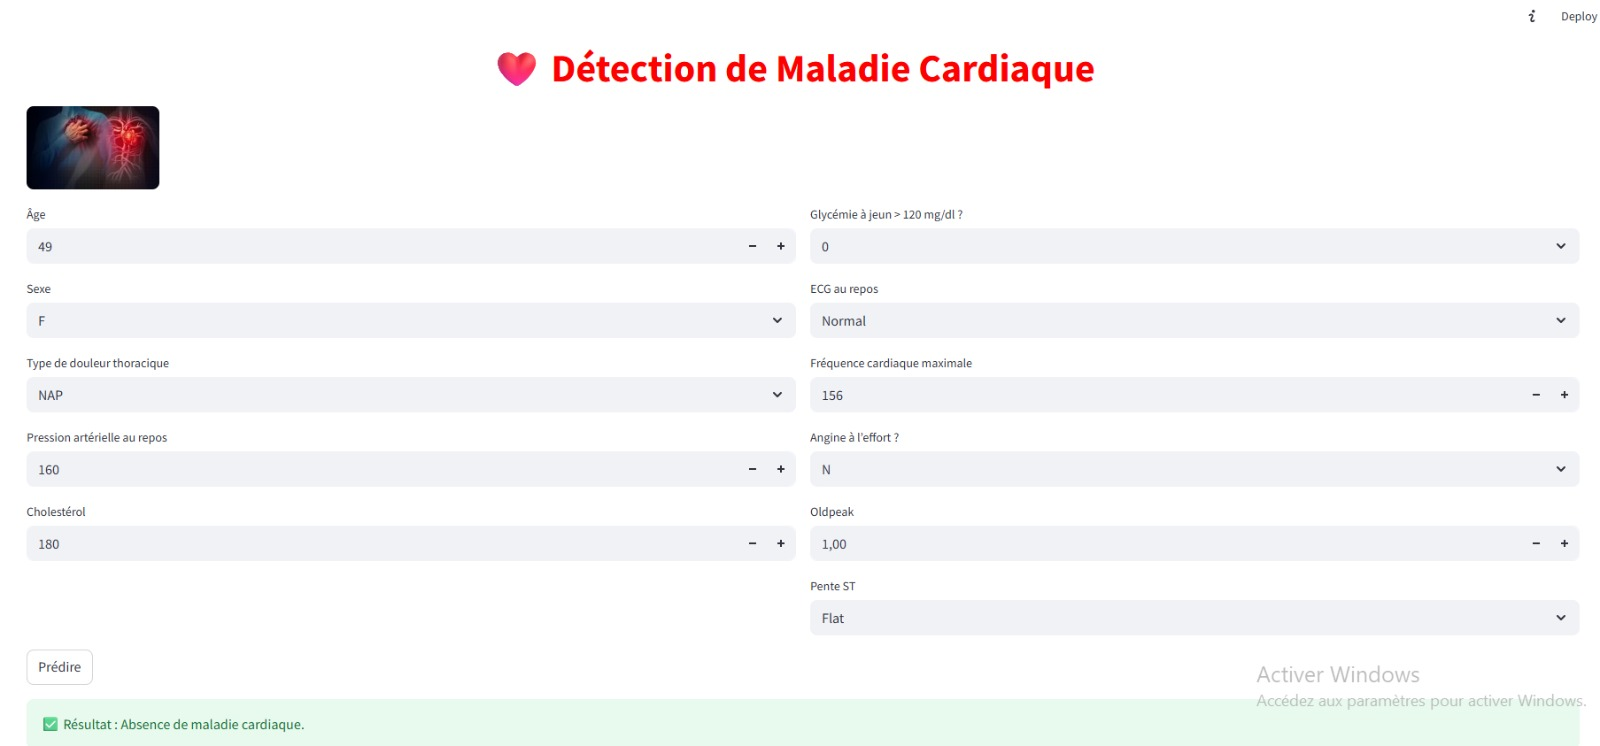

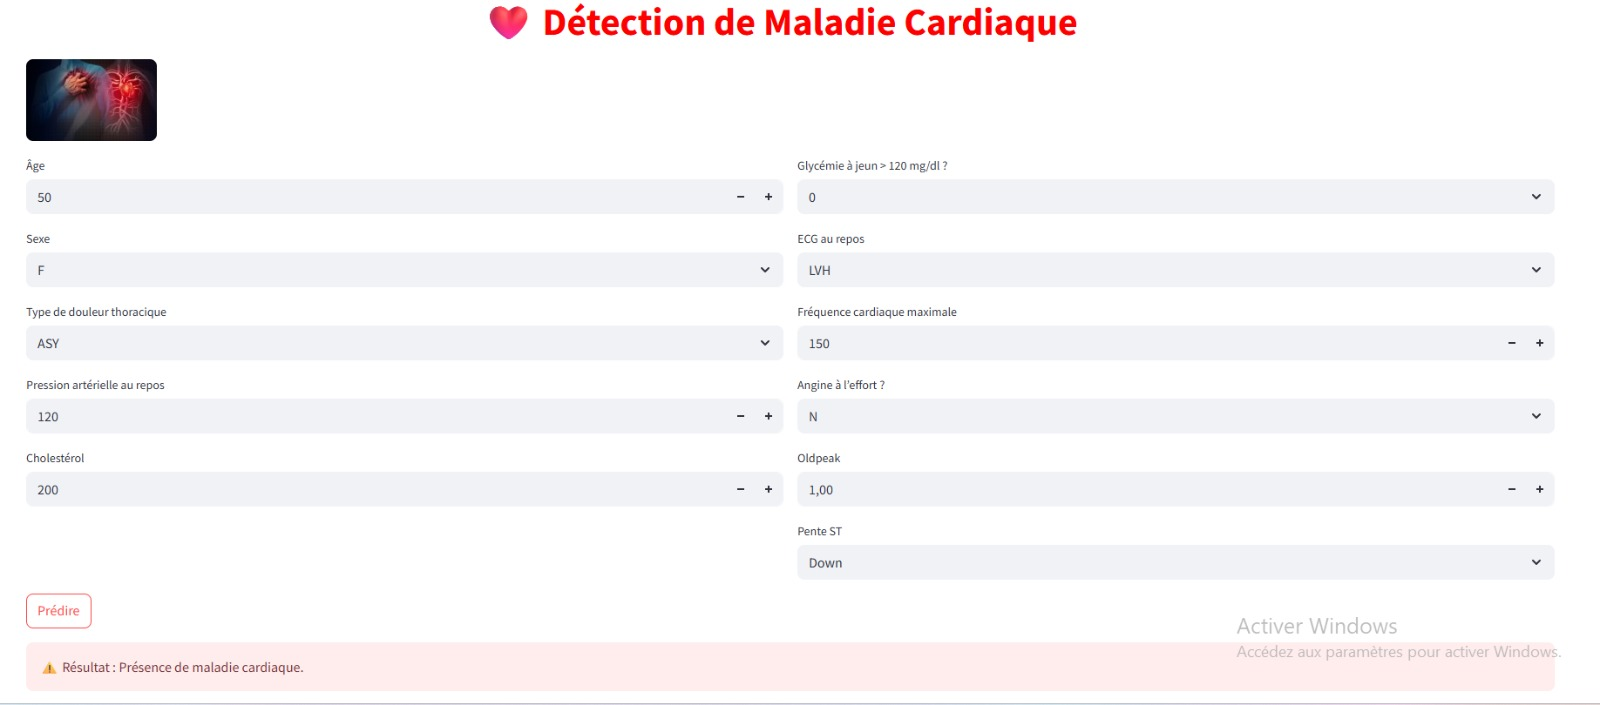